In [4]:
import numpy
import pandas as pd

In [7]:
df = pd.read_csv('../data/processed/processed.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them th...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

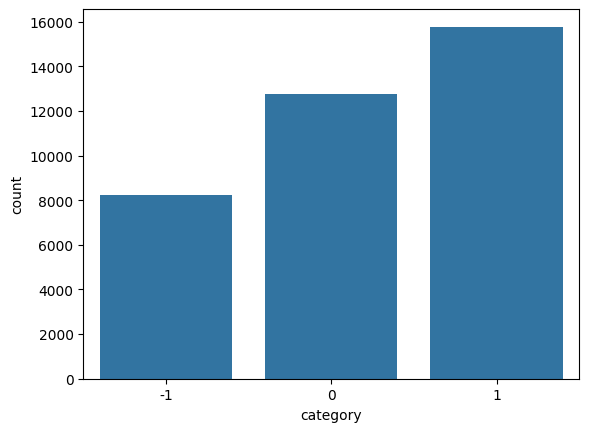

In [ ]:
# class distribution
sns.countplot(data=df,x="category")
 
#frequency distribution of sentiments
df['category'].value_counts(normalize=True).mul(100).round(2)

# That means data is imbalanced

In [53]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))
df.sample(5)
# We can observe Variability: Comments range from very short (1 words) to extremely long (400+ words).

,clean_comment,category,word_count
13382,majority media houses appears like bjp agents ...,-1,45
21168,spoilers,0,1
1727,you guys missed important part bowed down and ...,-1,49
33453,this very poor language know rajarajac old use...,-1,15
16987,been cruise all week and was waiting anxiously...,1,14


In [56]:
# Statistical Summary
df['word_count'].describe()


count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

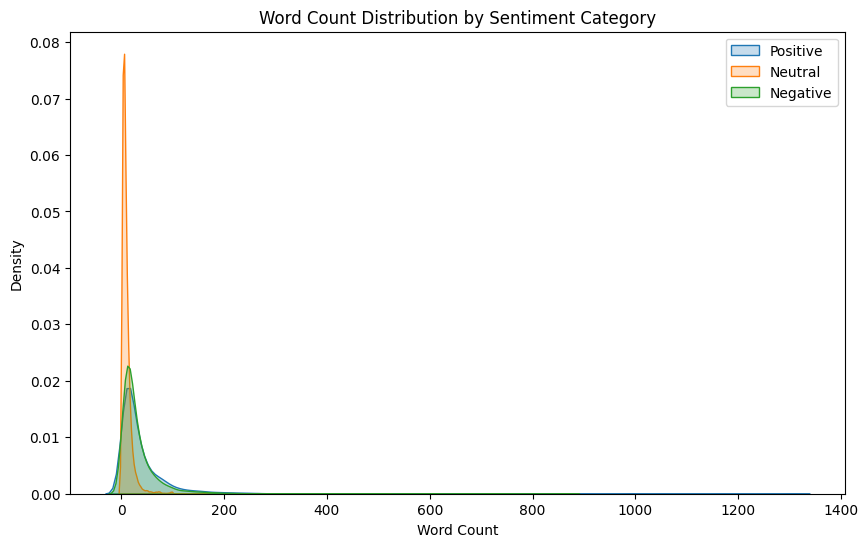

In [57]:
# Interpreting the Word Count Distribution by Sentiment Category
# KDE (Kernel Density Estimation)
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Sentiment Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Positive Comments (Category 1)
Wider Spread: The distribution spans a broader range of word counts, indicating that positive comments often include both short and very long texts.
Implication: Users expressing positive sentiments may elaborate more (e.g., detailed praise, explanations).

# Neutral Comments (Category 0)

Concentrated Around Shorter Lengths: The density peaks at lower word counts and drops sharply, suggesting most neutral comments are brief (e.g., factual statements, simple questions).
Implication: Neutral content tends to be concise and to-the-point.

# Negative Comments (Category -1)
Intermediate Spread: Similar to positive comments but with fewer extreme outliers (very long rants are less common).
Implication: Negative sentiments might be expressed in moderately long complaints, but not as extensively as positive ones.